# Problem Statement. 
<strong> <span class="title-normal">Credit Card Customer </span>
<span class="title-highlight">Clustering</span></strong> <br>
<span class="subtitle">to Get An Effective and Efficient Credit Card Marketing Strategy</span>
<hr>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [21]:
from sklearn.cluster import  KMeans
from  sklearn.decomposition import PCA
import  pandas as  pd
import  seaborn  as  sns
import numpy as np
import matplotlib.pyplot as  plt
import  warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
df  = df.drop("CUST_ID", axis =1)

In [24]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

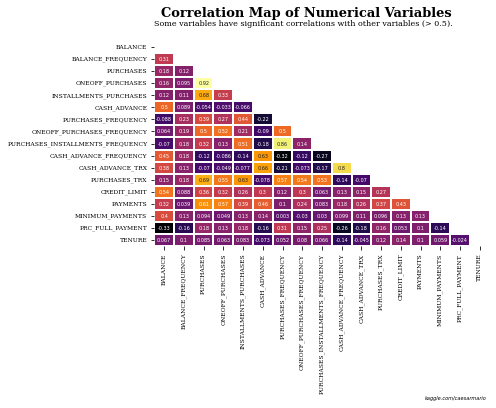

In [27]:
# --- Correlation Map (Heatmap) ---
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='inferno', linewidths=0.1, cbar=False, annot_kws={"size":5})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=6, fontfamily='serif')
ax.set_yticklabels(ylabels, size=6, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')
plt.title('Some variables have significant correlations with other variables (> 0.5).\n', fontsize=8, fontfamily='serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.gcf().text(0.85, 0.05, 'kaggle.com/caesarmario', style='italic', fontsize=5);
plt.show();

<div class="explain-box">
    From <b>dataset report</b> and <b>correlation matrix</b>, it can be <mark><b>concluded</b></mark> that:
    <blockquote style="color: #000000;">
        <ul>
            <li>There are <mark><b>missing values</b></mark> in <b>CREDIT_LIMIT</b> (<b>1</b> missing value) and <b>MINIMUM_PAYMENTS</b> (<b>313</b> missing values).</li>
            <li><mark><b>Most columns have a massive number of 0 values</b></mark>. Moreover, <mark><b>most columns are highly right-skewed</b></mark>, as seen from the histograms and the comparison of mean and median values (the mean value are smaller than the median value).</li>
            <li><mark><b>Some variables have moderate to high correlation values</b></mark> to other variables (>0.5 to 1). Examples of high correlation variables are <b>PURCHASES and ONEOFF_PURCHASES</b>, with a <b>0.92</b> correlation value. Another example is <b>CASH_ADVANCE_TRX with CASH_ADVANCE_FREQUENCY</b> with a <b>0.8</b> correlation value.</li>
            <li>When using a credit card, <b>most credit card customers prefer 12 months tenure</b> compared to other tenure options. This can be concluded that <mark><b>customers are more likely to repay credits in the long term with the consequence of a higher interest rate</b></mark>.</li>
            <li>When investigating the <b>BALANCE</b> column further, it seems that <b>there are many credit cards with 0 balances</b>. It is also supported with <b>so many 0 purchase amounts in PURCHASE column</b>. Based on those results, it can be assumed that <mark><b>some users are intentionally keeping the balance low in their account in order to get high credit limit</b></mark>, which affects to <mark><b>increase credit utilization ratio and the credit score</b></mark>.<br>
            </li>
            <li>Most of credit card accounts have <b>1 score</b> in <b>BALANCE_FREQUENCY</b> column, which indicates that <mark><b>most customers use credit card frequently</b></mark>. However, this is <b>different from ONEOFF_PURCHASES and PURCHASES_INSTALLMENT_FREQUENCY</b>, where the <mark><b>majority of customers do not use credit cards for one-time transactions or payments in installments</b></mark>.</li>
        </ul>
    </blockquote>
</div>

Dimensionaly reduction to save  on computations
- We  performed a  PCA to reduce  the  features  of  our  data.

Why Perform Principal Component Analysis (PCA) before using K-means clustering :

- Dimensionality Reduction: PCA reduces the dimensionality of the dataset by transforming it into a lower-dimensional space, which can help alleviate the "curse of dimensionality" and improve the efficiency of the K-means algorithm.
- Feature Correlation: PCA creates new features (principal components) that are linear combinations of the original features, which can help eliminate redundant or highly correlated features that might confuse the K-means algorithm.
- Improved Cluster Separation: PCA can help improve the separation of clusters by transforming the data in a way that better aligns with the underlying structure. This can lead to more meaningful and distinct clusters.
- Noise Reduction: PCA can help reduce noise in the dataset by emphasizing the most important features and suppressing less important ones, which can improve the quality of the clustering results.
- Faster Convergence: By reducing the dimensionality of the dataset, PCA can help the K-means algorithm converge faster, as it has fewer dimensions to consider during the optimization process.

In [28]:
pca = PCA(n_components=2)
df = pca.fit_transform(df)

df.shape

(8636, 2)

## Why use WCSS in K-means clustering:

1. WCSS is a quantitative measure of cluster compactness, which helps in evaluating the quality of clusters generated by the K-means algorithm.
2. By minimizing the WCSS, the K-means algorithm aims to find compact and well-separated clusters, which are easier to analyze and interpret.
3. WCSS is used in the Elbow Method to determine the optimal number of clusters (K) by identifying the point of inflection where adding more clusters doesn't significantly improve the WCSS.
4. WCSS provides a clear criterion for comparing different clustering solutions and selecting the most appropriate one for a given dataset.
5. WCSS allows for the assessment of the impact of different parameter settings in the K-means algorithm, helping to fine-tune the clustering process.

In [29]:
wcss_vals = []
for  k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df)
    wcss_vals.append(model.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
sns.lineplot(wcss_vals)
plt.title("Performing  WCSS 'Elbow method'")
plt.xlabel("Value (k)")
plt.ylabel("Inertia Values")
plt.grid()
plt.tight_layout()

## <div class="header2">K-Means</div>
<div class="explain-box">
    <blockquote style="color: #000000;">
    <mark><b>K-means clustering</b></mark> is a simple <b>unsupervised learning algorithm</b> that is used <b>to solve clustering problems</b>. It follows a simple procedure of <b>classifying a given data set into a number of clusters, defined by the letter "k"</b>, which is fixed beforehand. The clusters are then positioned as <b>points</b> and all observations or data points are associated with the nearest cluster, computed, adjusted and then the process starts over using the new adjustments until a desired result is reached.<br>
    <center>
    <img src="https://editor.analyticsvidhya.com/uploads/46668k-means-clustering-algorithm-in-machine-learning.png" alt="Kmeans" width="35%"><br>
    <i style="font-size: 10px;">🖼 K-Means Clustering by Pranshu Sharma</i>
    </center>
    </blockquote>
    Before implementing K-Means, the first step is to <mark><b>calculate the optimal number of clusters using the elbow score</b></mark>. Besides that, the <b>Calinski-Harabasz index will be utilized to determine the ideal number of clusters</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [ ]:
model = KMeans(n_clusters=4, max_iter=500)
model.fit(df)

In [ ]:
label = model.fit_predict(df)
label

In [ ]:
c_cl  = model.fit_transform(df)
c_cl.shape

In [ ]:
import  numpy as  np 
u_labels = np.unique(label)
centroids = model.cluster_centers_
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[:,0], centroids[:,1], c="k")
plt.legend()
plt.show()

<div class="explain-box">
    Based on the table above, it can be concluded that each cluster has the following <mark><b>characteristics</b></mark>:
    <blockquote style="color: #000000;">
        <ul>
            <li><mark style="font-weight: bold; background-color: #FFBB00">Cluster 1 (<u>Full Payers Users</u>)</mark>: Customers in this cluster are <mark style="font-weight: bold; background-color: #FFBB00"><b>active users of the bank's credit card</b></mark>. This can be seen from the frequency of the <b>balance which frequently changes</b> and the <b>balances amount is high enough</b> compared to other clusters. In addition, when compared to other clusters, <b>this cluster has higher mean value in several aspects</b> than other clusters. Credit card customers in this cluster also <b>actively use credit cards to facilitate transactions and installments</b>. <b>Cash advances, transactions, and installments in this cluster also occur more frequently</b>. The relatively <b>high tenure also shows that the credit scoring in this cluster is very good</b>.</li>
            <li><mark style="font-weight: bold; background-color: #3C096C; color: #FFFFFF;">Cluster 2 (<u>Starter/Student users</u>)</mark>: In contrast to cluster 1, <mark style="font-weight: bold; background-color: #3C096C; color: #FFFFFF;"><b>customers rarely/almost never use credit cards for transactions and installments</b></mark> in this cluster. This is because the customer <b>has a relatively small balance, the frequency of the balance rarely changes, and the installments are very low</b>. In addition, a <b>low credit limit</b> also shows that <b>customers rarely/almost never use credit cards to process credit transactions</b>, and customers in this cluster also <b>rarely make cash advances</b>. So, <mark style="font-weight: bold; background-color: #3C096C; color: #FFFFFF;"><b>it can be assumed that customers use credit cards for cash advance processes only with sufficient frequency</b></mark>. In addition, the low balance allows customers in this cluster <mark style="font-weight: bold; background-color: #3C096C; color: #FFFFFF;"><b>to be students or new users who use credit cards at this bank</b></mark>.</li>
            <li><mark style="font-weight: bold; background-color: #9D4EDD; color: #FFFFFF;">Cluster 3 (<u>Installment Users</u>)</mark>: In this cluster, customers use credit cards <mark style="font-weight: bold; background-color: #9D4EDD; color: #FFFFFF;"><b>specifically for installment purposes</b></mark>. This is due to the <b>relatively high level of transactions using installments in this cluster</b>. Moreover, customers in this cluster <b>often make transactions with very large amounts per transaction and the frequency and transactions of cash in advance are very small</b>. Customers in this cluster <b>very rarely make payments and cash in advance and have a relatively small cash-in-advance frequency and amount of payments</b>. It can be concluded that the <mark style="font-weight: bold; background-color: #9D4EDD; color: #FFFFFF;"><b>customers in this cluster are very suitable for credit cards specifically for installment needs</b></mark>.</li>
            <li><mark style="font-weight: bold; background-color: #FFE270">Cluster 4 (<u>Cash Advance/Withdraw Users</u>)</mark>: Customers in this cluster have <b>high balances, the balances frequency are always changing, and the frequency of cash in advance and cash in advance is high</b>. In addition, customers in this cluster have the <b>lowest interest rates compared to other clusters and have the second highest credit limit and payments</b> out of the four clusters. However, credit card users in this cluster <b>rarely make installments or one-off purchases and have the third-highest tenure</b> of the four clusters. Thus, it can be concluded that <mark style="font-weight: bold; background-color: #FFE270"><b>customers in this cluster only use credit cards for the need to withdraw money or cash advances</b></mark>.</li>
        </ul>